 **Team members:
Chenyu Liu (604924863)
Zhiyuan Chen (605363281)**



**Mount Your Google Drive storage**

Enter the code using the link generating once you run the below cell

In [0]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Assuming that you have**

1.   Mounted your Google Drive storage
2.   Uploaded the data files on Google Drive
3.   Have the path to your uploaded folder



Say you have placed all your data in "ECE113" folder on Google Drive or which is the case, update the `enter_your_folder_name` in the path

Eg. 

```
%cd "drive/'My Drive'/ECE113" 
```



In [0]:
# update this as per your folder name
%cd "/content/drive/My Drive/EE113 project" 

/content/drive/My Drive/EE113 project


Make sure you are in the correct working directory

In [0]:
!pwd

/content/drive/My Drive/EE113 project


Run the following code to verify whether you are in the correct directory on Google Colab

In [0]:
!ls

'Colab Notebooks'   Problem_1_data


# Problem 1 
## Audio signal transformation pipeline for feature extraction

In [0]:
# importing relevant libraries
from scipy.io import wavfile
import numpy as np
import pandas as pd
import os
from glob import glob


In [0]:
# update this with the path of your training_data folder

PATH= './Problem_1_data/training_data_1'

In [0]:
audio_file_paths = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.wav'))]

In [0]:
# since we have a total of 1994 chords i.e. ~200 files belonging to 10 classes
assert(len(audio_file_paths) == 1994)

In [0]:
len(audio_file_paths)

1994

## Dataset Creation

**Processing each audio file from the 10 chords type placed in 'Problem_1_data/training_data_1' .**


---


Expect this code to take ~15 mins to run

---



In [0]:
index = [i for i in range(len(audio_file_paths))]
columns = ['data', 'label']
df_train = pd.DataFrame(index=index, columns=columns)
for i, file_path in enumerate(audio_file_paths):
    fs, data = wavfile.read(file_path)
    # label assigned to each chord is the name of the folder it is placed inside
    label = os.path.dirname(file_path).split("/")[-1]
    df_train.loc[i] = [data, label]

In [0]:
y = df_train.iloc[:, 1].values
X = df_train.iloc[:, :-1].values
X = np.squeeze(X)
#X = np.stack(X, axis=0)

#test some random value to understand the code:
#print(y[0])
#print(X[0])
#print(df_train.loc[0])
print(y[400])
#print(X[200])

f


### Converting chord names into digits using LabelEncoder

In [0]:
from sklearn import preprocessing

labelencoder_y = preprocessing.LabelEncoder()
y = labelencoder_y.fit_transform(y)

#test some random value to understand the code:
#print(y[0])
print(y[200])

2


You can verify the digits assigned to each chord type below

In [0]:
labelencoder_y.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Tasks to perform

>  **(a)  Use the audio clip data to extract DFT features.  Plot the DFT for one chord from each chordtype (10 in total).  What do you observe?**





For chord a the frequency resolution (sample spacing) is:0.59


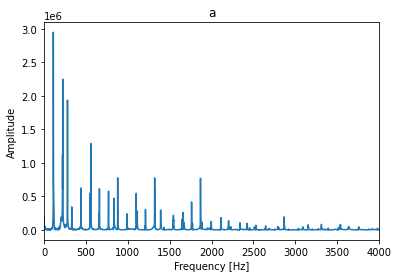

For chord am the frequency resolution (sample spacing) is:0.43


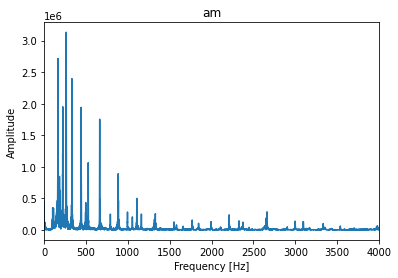

For chord bm the frequency resolution (sample spacing) is:0.81


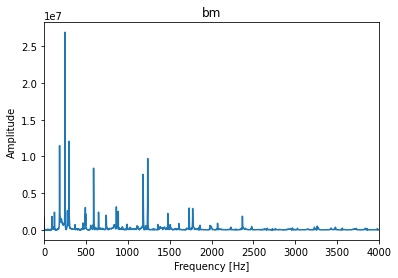

For chord c the frequency resolution (sample spacing) is:0.46


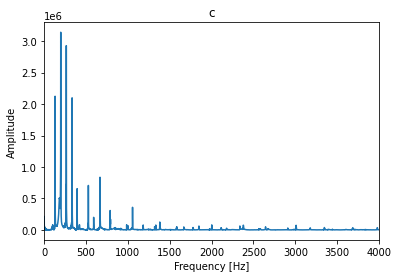

For chord d the frequency resolution (sample spacing) is:0.54


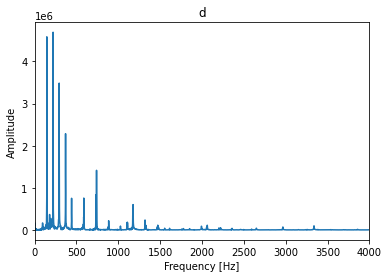

For chord dm the frequency resolution (sample spacing) is:0.7


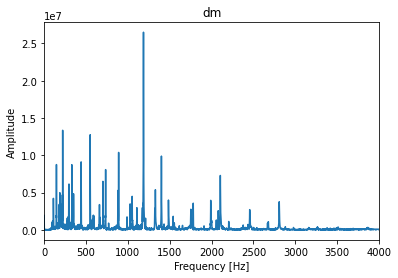

For chord e the frequency resolution (sample spacing) is:0.52


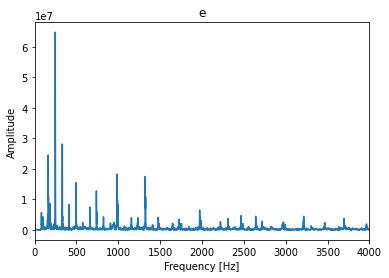

For chord em the frequency resolution (sample spacing) is:0.58


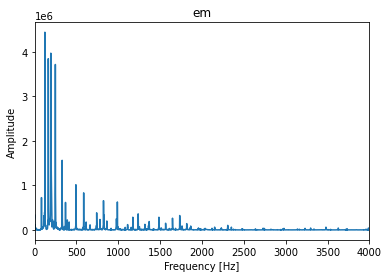

For chord f the frequency resolution (sample spacing) is:0.5


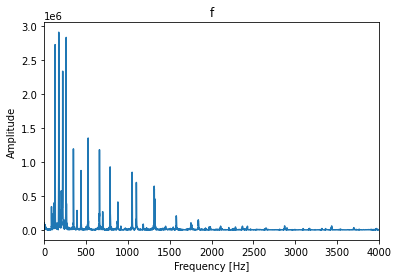

For chord g the frequency resolution (sample spacing) is:0.42


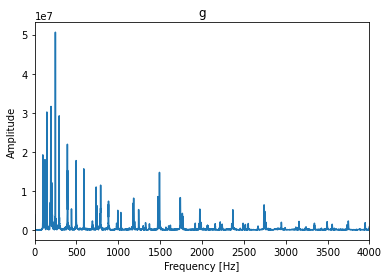

In [0]:
######## your code here #########
import matplotlib.pyplot as plt
import random

Fs=44100
training_chord=[] #create an array to store all the wavelets
#training_chord_name=[]

for i in range(10):
  ctype_index=np.squeeze(np.where(y==i)) #get all the index for one chordtype
  n=random.choice(ctype_index) #randomly choose one audio file from a type
  chord=X[n] #get the chord data
  training_chord.append(chord) #add to the storing array


  N=len(chord)
  X_k = np.fft.fft(chord)[0:int(N/2)] #take DFT of the chord data and take half of the signal due to symmetry
  X_k=np.abs(X_k)
  X_k=np.trim_zeros(X_k,'b') #get rid of the zeros at the end of the DFT

  
  f = Fs*np.arange(len(X_k))/N #the x-axis
  delta_f=Fs/N #the sample spacing of the x-axis (frequency resolution)
  delta_f=np.around(delta_f,2)


  title=df_train.iloc[n, 1] #get the chord name instead of the number from encoder
  #training_chord_name.append(title)

  # if using log, then uncomment below:
  #fig,ax = plt.subplots()
  #ax.set_xscale('log')
  #ax.set_yscale('log')

  print("For chord "+ title + " the frequency resolution (sample spacing) is:" + str(delta_f))
  plt.plot(f,X_k)
  plt.ylabel('Amplitude')
  plt.xlabel('Frequency [Hz]')
  plt.xlim(0,4000) #zoom in a region
  plt.title(title)
  plt.show()



> **(b)  Create  a  function  to  convolve  any  unknown  chord  type  with existing  data  you  have  for  each chord to detect which chord it belongs to**



In [0]:
###### create your function #######
def find_type(signal):
  U=[] #create an array to store all the energy of the cross-correlation with differnt wavelets

  for i in range(10):
    h=np.flip(training_chord[i]) #time reversal of the wavelets
    h=h/np.linalg.norm(h) #normalize the reversed wavelets signal
    H = np.fft.fft(h) #DFT of the wavelets
    N1=len(H)
    H_k=np.abs(H[0:int(N1/2)]) #DFT of the wavelet
    #corresponding frequencies of the DFT:
    f_H=Fs*np.arange(N1)/N1
    f_H=f_H[0:int(N1/2)]
    f_H=np.around(f_H,2) #take decimal of 2 in order to get more same frequency points in the later steps

    S = np.fft.fft(signal) #do the same for the input signal
    N2=len(S)
    S_k=np.abs(S[0:int(N2/2)])
    f_S=Fs*np.arange(N2)/N2
    f_S=f_S[0:int(N2/2)]
    f_S=np.around(f_S,2)


    u=[] #create an array of the multiplication of the signals in same frequencies

    same_f=np.intersect1d(f_H, f_S) #find the same frequencies of the two signals

    for i in range(len(same_f)):
      indices1=np.where(f_H==same_f[i]) #find the indices of the same frequencies
      indices2=np.where(f_S==same_f[i])
      u.append(H_k[indices1]*S_k[indices2]) #multiply the corresponding amplitude

    
    energy=np.linalg.norm(u)**2/len(u)
    U.append(energy)

  index=np.argmax(U) #find the max energy
  #chordtype=training_chord_name[index]

  return(index)

In [0]:
PATH= './Problem_1_data/test_data_1'
# max_length of audiofile

index = [i for i in range(10)]
columns = ['data']
df_test_1 = pd.DataFrame(index=index, columns=columns)
for i, file_path in enumerate(glob(os.path.join(PATH, '*.wav'))):
    fs, data = wavfile.read(file_path)
    df_test_1.loc[i] = [data]

In [0]:
X_test = df_test_1.iloc[:, :].values
X_test = np.squeeze(X_test)

Show the output of convolution between any two chord types from the training data

3
9
5
6
0
1
7
0
1
0
8
9
0
1
8
5
6
0
8
1
3
3
4
2
5
5
2
1
2
7
5
6
4
1
5
5
5
5
0
1
8
3
6
2
3
5
2
0
0
5
7
1
5
1
1
6
1
0
5
8
0
4
5
2
6
4
6
6
0
7
1
1
2
1
2
1
0
1
3
7
0
5
5
1
7
0
6
0
1
5
6
5
1
5
0
5
0
5
1
1
1
8
1
2
0
6
0
0
0
2
0
1
5
6
0
6
0
1
1
1
1
0
6
0
2
8
1
2
8
0
9
4
1
0
2
1
1
7
1
2
8
1
5
0
0
1
1
1
0
1
8
0
1
0
7
8
4
6
6
8
8
1
0
7
5
8
4
8
0
1
1
4
5
1
5
1
8
8
8
8
1
1
5
5
0
1
2
1
6
8
2
1
1
1
5
1
1
0
7
6
0
1
1
1
9
2
3
7
8
1
6
5
7
5
1
2
1
6
0
7
0
9
2
8
9
8
0
1
5
8
7
7
1
0
5
1
3
1
3
0
6
2
7
8
8
8
1
7
5
7
5
0
3
1
1
3
1
1
1
4
1
0
5
5
4
1
4
7
1
0
6
5
1
1
1
1
0
0
1
1
8
1
9
1
8
1
1
6
1
1
0
7
6
4
7
0
1
1
0
7
0
5
0
0
6
6
6
0
6
0
0
8
0
1
1
0
2
0
0
6
1
2
6
2
0
1
1
1
0
7
1
9
3
6
8
3
1
6
8
0
0
0
6
1
1
1
5
6
5
7
3
0
6
3
0
1
0
3
6
0
7
8
6
1
7
7
3
3
3
8
1
1
0
1
7
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
5
1
5
1
1
1
7
1
1
1
9
9
2
2
9
2
7
4
2
4
4
9
6
2
7
4
7
0
4
3
0
7
9
9
3
0
6
4
7
7
9
9
7
4
5
5
2
9
6
3
3
9
7
1
9
0
3
7
3
7
9
6
3
1
5
8
5
4
5
7
2
2
7
8
3
9
2
8
7
3
2
8
9
9
6
4
2
6
8
2
2
2
2
2
2
2
2
9
0
2
1
3
2
3
9
8
9
6
2
2


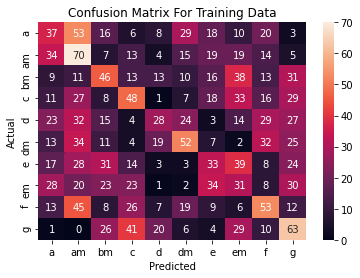

In [0]:
######## your code here #########

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

matrix_data=np.zeros([10,10], dtype=int)
for i in range(10):
  ctype_index=np.squeeze(np.where(y==i)) 
  for j in ctype_index:  #for all the files in one chrodtype
    signal=X[j]
    name=find_type(signal) #find the predicted chordtype using created function
    print(name)
    matrix_data[i][name] += 1

df_cm = pd.DataFrame(matrix_data, index = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g'],
                  columns = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g'])
#plt.figure(figsize = (10,7))
fig=sn.heatmap(df_cm, annot=True)
fig.set_xlabel('Predicted');fig.set_ylabel('Actual'); 
fig.set_title('Confusion Matrix For Training Data'); 



> **(c) Compare the test audio files provided with the given 10 chords dataset to determine the chordtype  using  the  autocorrelation  operation.  Express the auto correlation of x[n] and h[n] as x[n]*h[-n] where * denotes convolution.   Create  a  matrix  in  which  each  column  and  each  row corresponds  to  a  chord  of  a  given  type.  For  each  test  case,  if  a  test  case  is  actually  of  chordtype  j  and  is  predicted  by  your  implementation  as  chord  type  i,  add  1  element  (i,j)  in  the matrix.  The more the confusion matrix looks like a diagonal matrix, the better the predictionalgorithm is.  This is called a confusion matrix.  Use `imshow(), imagesc()`, or another analogous command to plot the confusion matrix as an image.  Be sure to label the axes.**







*Run the auto correlation operation with existing audio files to find out the chord type of the 10 test examples given in `X_test`*

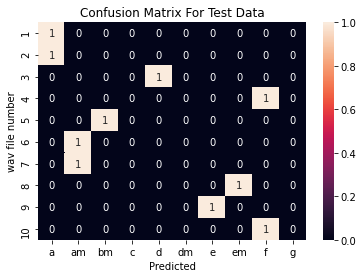

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

matrix_data=np.zeros([10,10], dtype=int)
for i in range(10):
  signal=X_test[i]
  name=find_type(signal)
  matrix_data[i][name] += 1


df_cm = pd.DataFrame(matrix_data, index = [1,2,3,4,5,6,7,8,9,10],
                  columns = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g'])
#plt.figure(figsize = (10,7))
fig=sn.heatmap(df_cm, annot=True)
fig.set_xlabel('Predicted');fig.set_ylabel('wav file number'); 
fig.set_title('Confusion Matrix For Test Data'); 

## From this section, you must turn in:


1.   All code
2.   A plot of the DFT of a single chord from each types and your observations for each part
3.   The results of your code given as a confusion matrix, along with some analysis of your results
4.   A suggestion for improving your accuracy



---


